In [127]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import seaborn as sns

In [128]:
movie = pd.read_csv('/Users/jiwonkwun/Asac/Bechdel-IMDB-project/movies_org1.csv', index_col=0, converters={'imdbid': lambda x: str(x)})

In [129]:
movie

,imdbid,title,year,imdb_rating,estimated_budget,world_gross($),bechdel_rating
0,3155794,Passage de Venus,1874,6.8,NaN,0,0.0
1,14495706,La Rosace Magique,1877,5.8,NaN,0,0.0
2,2221420,Sallie Gardner at a Gallop,1878,7.4,NaN,0,0.0
3,12592084,Le singe musicien,1878,6.0,NaN,0,0.0
4,7816420,Athlete Swinging a Pick,1881,5.1,NaN,0,0.0
...,...,...,...,...,...,...,...
9596,10954600,Ant-Man and the Wasp: Quantumania,2023,6.2,"$200,000,000 (estimated)",474579171,3.0
9597,12844910,Pathaan,2023,6.0,"$17,487,476",128780000,3.0
9598,10365998,Infinity Pool,2023,6.1,"$5,078,400",5181707,2.0
9599,14209916,Cocaine Bear,2023,6.0,"$35,000,000 (estimated)",87170346,3.0


In [162]:
# bechdel and imdb ratings with no NA
bec_imdb = movie[(movie['imdb_rating'].isna()==False)&(movie['imdb_rating'].isna()==False)]
bec_imdb

,imdbid,title,year,imdb_rating,estimated_budget,world_gross($),bechdel_rating
0,3155794,Passage de Venus,1874,6.8,NaN,0,0.0
1,14495706,La Rosace Magique,1877,5.8,NaN,0,0.0
2,2221420,Sallie Gardner at a Gallop,1878,7.4,NaN,0,0.0
3,12592084,Le singe musicien,1878,6.0,NaN,0,0.0
4,7816420,Athlete Swinging a Pick,1881,5.1,NaN,0,0.0
...,...,...,...,...,...,...,...
9596,10954600,Ant-Man and the Wasp: Quantumania,2023,6.2,"$200,000,000 (estimated)",474579171,3.0
9597,12844910,Pathaan,2023,6.0,"$17,487,476",128780000,3.0
9598,10365998,Infinity Pool,2023,6.1,"$5,078,400",5181707,2.0
9599,14209916,Cocaine Bear,2023,6.0,"$35,000,000 (estimated)",87170346,3.0


<Axes: xlabel='imdb_rating'>

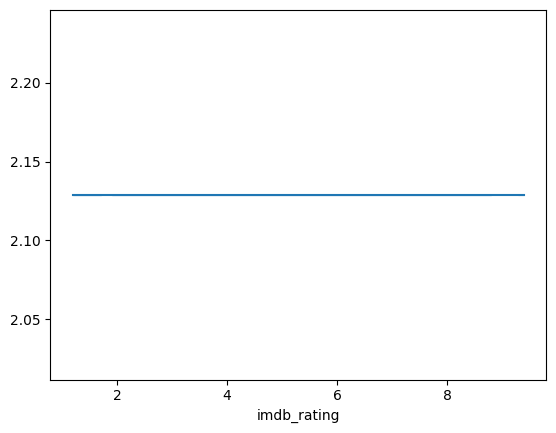

In [145]:
sns.lineplot(data = movie, y = movie['bechdel_rating'].mean(), x = 'imdb_rating')

<Axes: xlabel='bechdel_rating', ylabel='world_gross($)'>

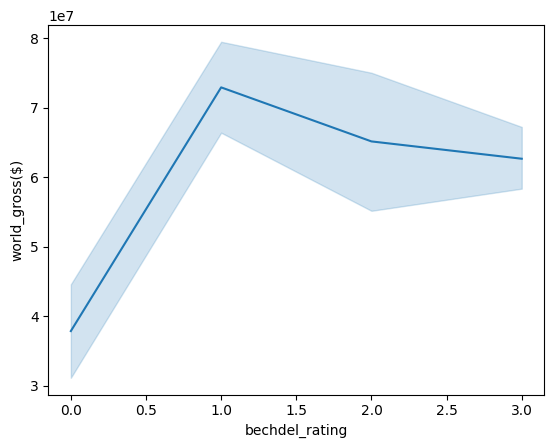

In [146]:
sns.lineplot(data = movie, x = 'bechdel_rating', y = 'world_gross($)')

<Axes: xlabel='imdb_rating', ylabel='world_gross($)'>

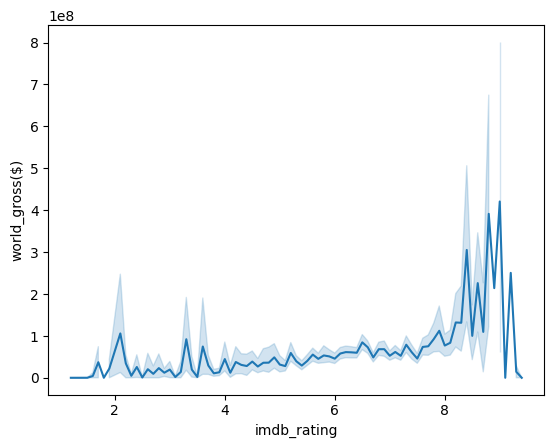

In [147]:
sns.lineplot(data = movie, x = 'imdb_rating', y = 'world_gross($)')

In [ ]:
group1 = movie[movie[]]

In [168]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc

In [163]:
model = ols('imdb_rating ~ C(bechdel_rating)', bec_imdb).fit()
anova_lm(model)
# F-ratio > 1 == 벡델 점수 평균간에 차이가 있다
# p-value <0.05 == 관계성이 있다
# 사후 분석 필요

,df,sum_sq,mean_sq,F,PR(>F)
C(bechdel_rating),3.0,71.594707,23.864902,22.879104,9.412688e-15
Residual,9565.0,9977.129835,1.043087,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   0.0    1.0   0.0784 0.1748 -0.0205  0.1773  False
   0.0    2.0   0.0315 0.8984 -0.0847  0.1477  False
   0.0    3.0  -0.1218 0.0021 -0.2098 -0.0338   True
   1.0    2.0  -0.0469  0.636 -0.1485  0.0547  False
   1.0    3.0  -0.2002    0.0 -0.2678 -0.1326   True
   2.0    3.0  -0.1533 0.0001 -0.2444 -0.0623   True
----------------------------------------------------


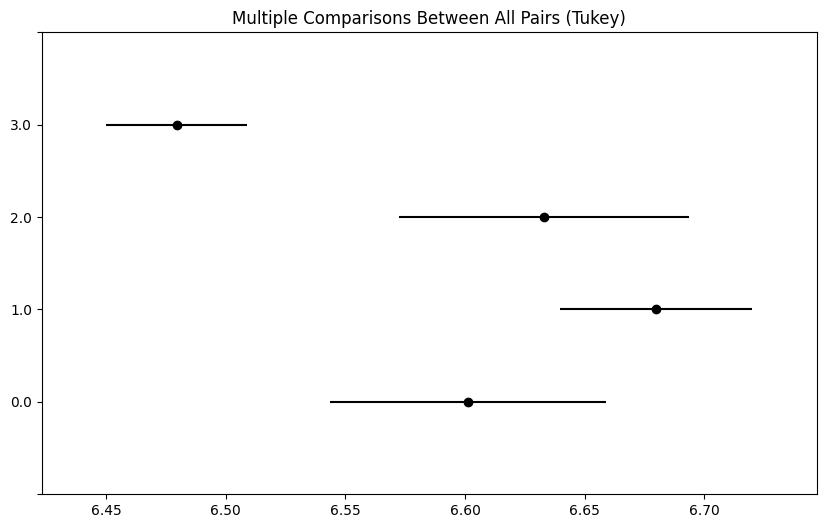

In [169]:
# Tukey HSD 방식
comp = mc.MultiComparison(bec_imdb['imdb_rating'], bec_imdb['bechdel_rating'])
tukeyhsd = comp.tukeyhsd(alpha = 0.05)
tukeyhsd.summary()

print(tukeyhsd)
fig = tukeyhsd.plot_simultaneous()